# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook.

### Load Modules/Libraries

In [131]:
# import modules, libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json

# for progress/status bar
from tqdm import tqdm  

# to allow time/timing functions
import time 

#to faciliate working with variable names
from varname import argname 

# working with regex patterns
import re

# plotting/visualization
import matplotlib
import matplotlib.pyplot as plt

### WeRateDogs Twitter archive data

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [132]:
# contructed the dataframe from csv file
# 2nd interation: reloaded the data with the dtype parameter so ids were strings
tweets = pd.read_csv('twitter-archive-enhanced.csv', dtype={'tweet_id':'string'})

In [133]:
# quick peak at data
print(tweets.shape)
tweets.head(2)

(2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


### Tweet Image Prediction (.tsv)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [134]:
# name folder to download file to
folder_name = 'image_preds'

# create folder if it doesn't already exist
if not os.path.exists(folder_name): 
    os.makedirs(folder_name)

In [135]:
# assign file url address
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# request file at url and retreive content
response = requests.get(url)

# check for successful request / file retrieval (looking for Response [200])
if response.status_code == 200:
    print("File download request successful")
else:
    print("File download request failed")

File download request successful


In [136]:
# save to file
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    filepath = str(file).split("'")[1]
    print(f'file saved: {filepath}')

file saved: image_preds/image-predictions.tsv


In [137]:
# check that file was downloaded
os.listdir(folder_name)

['image-predictions.tsv']

In [138]:
# image predictions (img_preds) dataframe created
# 2nd interation: reloaded the data with the dtype parameter so ids were strings
img_preds = pd.read_csv(filepath, sep='\t', dtype={'tweet_id':'string'})

In [139]:
# quick peak at data
print(img_preds.shape)
img_preds.head(2)

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Additional Twitter Data via api/Tweepy

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [59]:
# create output filename and write headers to file, then close
folder = os.getcwd()
filename = 'tweet_json.txt'
file = open(folder + "/" + filename, 'w')
print('id_str', 'retweet_count', 'favorite_count', sep=',', file=file)
file.close()

In [60]:
# api access authorization
auth = tweepy.AppAuthHandler('xxxxxxxxxxxx', 'xxxxxxxxxxxx')
api = tweepy.API(auth, wait_on_rate_limit=True)

In [61]:
# tweets to request via api
tweet_ids = tweets.tweet_id[:]

In [62]:
# creating/initializing data structures and variables
nf_exceps = [] # NotFound exception list
nf_count = 0
exceps_list = []
exceps_count = 0
requests = 0

# open file
with open('tweet_json.txt', 'a') as f:
    #starting timing
    start_time = time.time()
    
    # for loop for downloading tweets via api
    # tqdm progress/status bar utilized
    for t in tqdm(tweet_ids):
        requests += 1
        try:
            tweet = api.get_status(t, trim_user=True)
            print(tweet._json['id_str'], tweet._json['retweet_count'], tweet._json['favorite_count'], sep=',', file=f)
        
        # error handling
        except tweepy.TweepyException as err:   
            exceps_count += 1
            if tweepy.errors.NotFound:
                nf_count += 1
                nf_exceps.extend([t, tweepy.errors.NotFound])
        
print(f'Total tweets requested: {requests}')
print(f'Total tweets downloaded: {requests - nf_count}')
print(f'Total exceptions: {exceps_count}')
print(f'"Not Found" type exceptions: {nf_count} \n')

# check and print total elasped time with time.time() function
print(f'Total elasped time to download tweet data: {(time.time()-start_time)/60} minutes')


100%|██████████| 2356/2356 [31:27<00:00,  1.25it/s]    

Total tweets requested: 2356
Total tweets downloaded: 2328
Total exceptions: 28
"Not Found" type exceptions: 28 

Total elasped time to download tweet data: 31.458659017086028 minutes


In [140]:
# create dataframe with twitter api data from file
# 2nd interation: reloaded the data with the dtype parameter so ids were strings
retweets_likes = pd.read_csv('tweet_json.txt', dtype={'id_str': str})

In [141]:
# quick peak at data
print(retweets_likes.shape)
retweets_likes.head(2)
# type(retweets_likes.iloc[0,0]) ...check if tweet_ids are string dtype

(2328, 3)


,id_str,retweet_count,favorite_count
0,892420643555336193,7125,34288
1,892177421306343426,5369,29737


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

>**A user-defined function was created below to faciliate obtaining various summary information and insights on the subject dataframes - once it is called (with subject dataframe passed), it will display results from the following pandas attributes and methods:**
>* **.shape, .head(), .tail(), .sample(), .info(), .duplicated().sum(), .describe(), .nunique()**

In [142]:
# create data assessment function to reduce typing/repetitiveness
def initial_review(df):
    """calling this function provides high level information on dataframe (variable name) passed as input"""
    df_name = argname('df')
    print('Displaying high level dataframe information... \n')
    print(f'{df_name}.shape (num of rows, num of columns):')
    display(df.shape)
    print(f'{df_name}.head() output:')
    display(df.head())
    print(f'{df_name}.tail() output:')
    display(df.tail())
    print(f'{df_name}.sample(5) output:')
    display(df.sample(5))
    print(f'See {df_name}.info() output below (check data types, NULLs, all column names, and number of rows):\n')
    df.info()
    print(f'Number of duplicate rows = {df.duplicated().sum()} \n')
    print(f'{df_name}.describe() output:')
    display(df.describe())
    print(f'{df_name}.nunique() output:')
    display(df.nunique())
    pass

### tweets Dataframe - Initial Review

In [143]:
# calling user-defined initial review function
initial_review(tweets)

Displaying high level dataframe information... 

tweets.shape (num of rows, num of columns):


(2356, 17)

tweets.head() output:


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


tweets.tail() output:


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


tweets.sample(5) output:


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
592,798933969379225600,NaN,NaN,2016-11-16 17:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Iroh. He's in a predicament. 12/10 someone help him https://t.co/KJAKO2kXsL,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/798933969379225600/photo/1,https://twitter.com/dog_rates/status/798933969379225600/photo/1",12,10,Iroh,None,None,None,None
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1738,679527802031484928,NaN,NaN,2015-12-23 05:03:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This little pupper just arrived. 11/10 would snug https://t.co/DA5aqnSGfB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679527802031484928/photo/1,11,10,None,None,None,pupper,None
358,830097400375152640,NaN,NaN,2017-02-10 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Samson. He's absolute fluffy perfection. Easily 13/10, but he needs your help. Click the link to find out more\n\nhttps://t.co/z82hCtwhpn https://t.co/KoWrMkbMbW",NaN,NaN,NaN,"https://www.gofundme.com/sick-baby-samson,https://twitter.com/dog_rates/status/830097400375152640/photo/1,https://twitter.com/dog_rates/status/830097400375152640/photo/1,https://twitter.com/dog_ra...",13,10,Samson,None,None,None,None
509,812466873996607488,NaN,NaN,2016-12-24 01:16:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mary. She's desperately trying to recreate her Coachella experience. 12/10 downright h*ckin adorable https://t.co/BAJrfPvtux,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812466873996607488/photo/1,12,10,Mary,None,None,None,None


See tweets.info() output below (check data types, NULLs, all column names, and number of rows):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   string 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64 

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


tweets.nunique() output:


tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [148]:
# find retweet row/records
tweets.query(('retweeted_status_id != "NaN"') or
             ('retweeted_status_user_id != "NaN"') or
             ('retweeted_status_timestamp != "NaN"')).shape

(181, 17)

>**Based on the above information, a number of data issues have been identified and summarized in the Quality and Tidiness sections below.**
>
>**Also of note:**
>* **Initially the `tweet_id`s were recognized as dtype `int` when the dataframe was first constructed from the csv file. To avoid potential number truncating/loss of accuracy, the data was reloaded above using `pd.read_csv()` `dtype` parameter. They are now `string` dtype.**
>* **There appears to be 181 retweets that will need to be removed.**
>
>**Further review of the dataframe continues below.**

In [149]:
# check duplicates in id column
tweets.tweet_id.duplicated().sum()

0

In [150]:
# check uniques in a specific column of interest
tweets.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [151]:
# check quantities of the above unique values
tweets.rating_numerator.value_counts()
#s[s > 2]

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

>**Based on the above findings, it appears that the ratings may be intended to generally be 15 or less. It also seems that there are some erroneous data in the dataset, some of which that will be addressed in the cleaning section.**

In [152]:
# check uniques in a specific column of interest
tweets.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [153]:
# check quantities of the above unique values
tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

>**Based on the above, it appears that the rating denominator is intended to be 10, as expected, and as was the case with the numerator, there are some erroneous data.**

In [154]:
# check counts for the various name entries
tweets.name.value_counts(ascending=False)

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Kirk         1
Sweet        1
Rover        1
Bubba        1
Beemo        1
Name: name, Length: 957, dtype: int64

>**From above, we see that there are many missing or mis-identified dog names**
>
>**From a programatic check below, we see that it appears that lowercase `name` entries are generally not dog names.**

In [155]:
# use regex to find any lowercase name entries
lower = tweets.name.str.contains('^[a-z]')
tweets[lower == True]['name'].value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
actually         2
not              2
mad              2
getting          2
all              1
his              1
this             1
old              1
unacceptable     1
light            1
by               1
life             1
my               1
space            1
incredibly       1
such             1
officially       1
infuriating      1
Name: name, dtype: int64

In [156]:
# check uniques in a specific column of interest
tweets.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [157]:
# check uniques in a specific column of interest
tweets.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [158]:
# check uniques in a specific column of interest
tweets.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [159]:
# check uniques in a specific column of interest
tweets.puppo.unique()

array(['None', 'puppo'], dtype=object)

>**Based on the above cells, it appears the dog stage columns may be of decent quality to start - this will faciliate tidiness cleaning improvements carried out later.**
>
>**Overall, there are lots of quality issues with the data that could be tackled, but let's see what emerges as most interesting/useful after looking at the 2nd dataframe below...**

### img_preds Dataframe - Initial Review

In [160]:
# calling user-defined initial review function
initial_review(img_preds)

Displaying high level dataframe information... 

img_preds.shape (num of rows, num of columns):


(2075, 12)

img_preds.head() output:


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


img_preds.tail() output:


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


img_preds.sample(5) output:


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
258,670780561024270336,https://pbs.twimg.com/media/CU8XW2dWwAA-Lmc.jpg,1,Labrador_retriever,0.244889,True,American_black_bear,0.056994,False,brown_bear,0.053993,False
1028,710997087345876993,https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg,1,malamute,0.281260,True,Eskimo_dog,0.232641,True,Pembroke,0.091602,True
202,669683899023405056,https://pbs.twimg.com/media/CUsx8q_WUAA-m4k.jpg,1,Pomeranian,0.998275,True,Chihuahua,0.000605,True,Pekinese,0.000516,True
1423,772117678702071809,https://pbs.twimg.com/media/Crcc7pqXEAAM5O2.jpg,1,Labrador_retriever,0.217821,True,beagle,0.157677,True,golden_retriever,0.127726,True
1784,829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,golden_retriever,0.573140,True,cocker_spaniel,0.111159,True,gibbon,0.094127,False


See img_preds.info() output below (check data types, NULLs, all column names, and number of rows):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   string 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4), string(1)
memory usage: 152.1+ KB
Number of duplicate rows = 0 

img_preds.describe() output:


,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


img_preds.nunique() output:


tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [161]:
img_preds.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

>**Some observations for the img_preds dataframe (additional issues can be found in the Quality and Tidiness sections further below.)**
>* **The number of records are less than the main `tweet` dataframe (suggesting that not all tweets included an image).**
>* **The number of unique `jpg_url`'s vs `tweet_id`'s doesn't match which is peculiar.**
>* **There are a significant number of False items in the p1_dog column, indicating there are a large nubmer of non-dog tweets.**

>**Looking a little closer at the subject dataframe...**

In [162]:
# check lower case entries....generally not dogs by the looks of things
pd.Series(img_preds.p1.unique())[pd.Series(img_preds.p1.unique()).str.contains('^[a-z]', regex=True)].sample(20)

18       desktop_computer
345                bakery
288               bathtub
209                   bow
239              bluetick
300                bonnet
348              bookcase
331               maillot
217         walking_stick
241              carousel
1                 redbone
253            white_wolf
237             earthstar
350                 loupe
210                 stove
4      miniature_pinscher
84        shopping_basket
112               cuirass
376             limousine
341            pool_table
dtype: object

>**From the output above, the lowercase words/names in the dataframe generally do not represent dog names.**

### retweets_likes dataframe - Initial Review

In [163]:
# calling user-defined initial review function
initial_review(retweets_likes)

Displaying high level dataframe information... 

retweets_likes.shape (num of rows, num of columns):


(2328, 3)

retweets_likes.head() output:


,id_str,retweet_count,favorite_count
0,892420643555336193,7125,34288
1,892177421306343426,5369,29737
2,891815181378084864,3533,22378
3,891689557279858688,7318,37455
4,891327558926688256,7873,35777


retweets_likes.tail() output:


,id_str,retweet_count,favorite_count
2323,666049248165822465,37,91
2324,666044226329800704,117,251
2325,666033412701032449,36,102
2326,666029285002620928,39,115
2327,666020888022790149,431,2312


retweets_likes.sample(5) output:


,id_str,retweet_count,favorite_count
1559,686760001961103360,1286,3296
1072,735991953473572864,1048,3348
973,747963614829678593,1990,5454
1916,673708611235921920,261,971
1755,677673981332312066,1374,3088


See retweets_likes.info() output below (check data types, NULLs, all column names, and number of rows):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2328 non-null   object
 1   retweet_count   2328 non-null   int64 
 2   favorite_count  2328 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB
Number of duplicate rows = 0 

retweets_likes.describe() output:


,retweet_count,favorite_count
count,2328.000000,2328.000000
mean,2510.878866,7153.710481
std,4252.087404,11113.010277
min,1.000000,0.000000
25%,504.750000,1241.250000
50%,1169.000000,3092.500000
75%,2909.500000,8730.500000
max,71973.000000,146857.000000


retweets_likes.nunique() output:


id_str            2328
retweet_count     1675
favorite_count    1983
dtype: int64

>**From the above, the `retweets_likes` dataframe is in good shape and essentially ready to use/merge. The tweepy/api worked well!**

Based on the above visual and programmatic checks, there are numerous issues. Below I have identified 8 quality and 2 tidiness issues to fix/improve in an effort to support some worthy analysis/visualization. (Note: Some of the issues outlined below may not have been identified above, but after further consideration these are the issues I have chosen to work to help develop a dataset for, and support, analysis and visualization.)

### Prelim Ideas for Analysis/Visualization
* **Most popular dog names**
* **Top dog ratings**
* **correlation between ratings and retweet/like counts**

**Issues Identification Method legend:** 
* **VI: Visually Identified**
* **PI: Programatically Identified**  

### REVISED - DATA ISSUES (8 quality issues &n 2 tidiness issues)

1. QUALITY. (PI) The `tweet_ids` for each of the dataframes are being interpreted as `int` when read in by the read_csv() function, these will be converted to dtype `string`.

2. **NEW QUALITY.** (VI/PI) There appear to be 181 retweets in the data, which should not be there.**

3. QUALITY. (VI/PI) There are a number of irrelevant columns (and some with largely null values) to be addressed in the `tweets` dataframe.

4. QUALITY. (VI/PI) a number of records in the `tweets` dataframe have more than 1 dog stage identifier (e.g. doggo and pupper).

5. **REVISED: TIDINESS.** (VI) Categorical dog stages are in separate columns in the `tweets` dataframe (e.g. doggo, floofer), but should be in a single column.**

6. QUALITY. (PI) Numerous rows in the `img_preds` dataframe have non-dog data.

7. QUALITY. (PI/VI) Numerous rows in the `tweets` dataframe have erroneous data (e.g. tweets about owls, sharks).

8. QUALITY. (VI/PI) There are a number of decimal (numerator) ratings that were not correctly identified in the initial data (e.g. 9.75).

9. QUALITY. (VI/PI) There are a number of very high ratings that may have to do with with multiple dogs/ratings being provided in aggregate (e.g. 88/80 --> 11/10).

10. **REVISED: TIDINESS.** (PI) The tweet data is spread out in 3 individual dataframes, but they should be contained in a single master dataset.


## Cleaning Data

In [427]:
# Make copies of original pieces of data
tweets_df = tweets.copy()
img_preds_df = img_preds.copy()
retweets_likes_df = retweets_likes.copy()

### Issue #1 - Quality: Fixing `tweet_id` dtype `int` issue

#### Define
Regardless of what dtype the `tweet_id`s were initially, once the csv-files were opened and read-into a dataframe via `pd.read_csv()` the ids were converted to `int`s. To fix the issue the dataframes were built again using the `pd.read_csv()` function, but this time with the `dtype` parameter utilized.

#### Code

In [428]:
# example code used (see Gathering section of notebook where each csv-file was read in)
# pd.read_csv('xxxxxxxxx.txt', dtype={'id_str': str})

#### Test

In [429]:
# for tests, please see Gathering section of notebook where each of the 3 files were used to build dataframes
# using pd.read_csv('xxxxxxxxx.txt', dtype={'id_str': str})

### Issue #2 - NEW Quality: New Removing Retweets

#### Define
**New Quality Issue**

Retweet items do not belong in the dataset and need to be removed. This will be accomplished by filtering out and keeping the rows without retweets.

#### Code

In [430]:
# query non-retweet records and assign/overwite dataframe
tweets_df = tweets_df.query(('retweeted_status_id == "NaN"') or
             ('retweeted_status_user_id == "NaN"') or
             ('retweeted_status_timestamp == "NaN"'))

#### Test

In [431]:
# check that only nulls now exist in the retweet related columns (i.e. all retweet rows are removed)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   string 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #3 - Quality: tweets_df irrelevant columns (and Nulls)

#### Define
Remove columns that are irrelevant to the investigation noted above (this will also handle the nulls). Pandas DataFrame.drop() method will be used.

#### Code

In [432]:
# unnecessary columns
twt_drop_labels = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'source']

In [433]:
# remove unnecessary columns (and those with large numbers of NaNs)
tweets_df.drop(labels=twt_drop_labels, axis=1, inplace=True)

In [434]:
# before removing timestamp column, check the dates on tweets
tweets_df.timestamp.min(), tweets_df.timestamp.max()

('2015-11-15 22:32:08 +0000', '2017-08-01 16:23:56 +0000')

In [435]:
# remove unnecessary columns
tweets_df.drop(labels='timestamp', axis=1, inplace=True)

#### Test

In [436]:
# check that the columns were removed
tweets_df.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [437]:
# check for any remaining nulls
tweets_df.isnull().any().any()

False

### Issue #4 - Quality: fix multiple dog stage values

#### Define

Remove records in the `tweets_df` dataframe having more than 1 dog stage identifier (e.g. doggo and pupper). The main steps to be coded include:
* Building lists of rows to be corrected (lists are built manually since the number of rows is small).
* Using/applying the above lists through indexing (`.loc`) and `.drop()`.
* In cases where a tweet included 2 dogs and 2 dog stages, `.loc` is used to create duplicate rows (in the form of a small new dataframe) so that the dog stages can be corrected.
* Finally, the small new dataframe above is appended to the main `tweets_df` dataframe.

#### Code

In [438]:
# increase max_colwidth setting to improve readability of the text column
pd.set_option("max_colwidth", 200)

In [439]:
# generate list of rows that have more than 1 dog stage identifier (i.e. less than 3 'None's)
chk_index = []

for row in tweets_df.index:
    if tweets_df.loc[row, 'doggo':'puppo'].value_counts().loc['None'] < 3:
        chk_index.append(row)

chk_index

[191, 200, 460, 531, 565, 575, 705, 733, 889, 956, 1063, 1113]

In [440]:
# view tweets/rows that need to be treated
tweets_df.loc[chk_index]

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,13,10,None,doggo,None,None,puppo
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",11,10,None,doggo,floofer,None,None
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",13,10,Dido,doggo,None,pupper,None
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,None,doggo,None,pupper,None
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",11,10,None,doggo,None,pupper,None
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",12,10,None,doggo,None,pupper,None
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5,10,None,doggo,None,pupper,None


In [441]:
# using the view above, create issue-specific lists
no_doggo = [191,460,575]
no_pupper = [705]
d_row = [200,956]
doggo_pupper =[531,565,733,889,1063,1113]

# use/apply lists above to correct issues
tweets_df.loc[no_doggo, 'doggo'] = None
tweets_df.loc[no_pupper, 'pupper'] = None
tweets_df.drop(d_row, axis=0, inplace=True)

In [442]:
# generate list of tweet_ids for the tweets with two dog stages ('doggo' and 'pupper')
doggo_pupper_ids = list(tweets_df.loc[doggo_pupper].tweet_id)
# view the problem rows
tweets_df.loc[doggo_pupper]

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,None,doggo,None,pupper,None
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",11,10,None,doggo,None,pupper,None
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",12,10,None,doggo,None,pupper,None
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Maggie,doggo,None,pupper,None
1063,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,12,10,just,doggo,None,pupper,None
1113,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",12,10,None,doggo,None,pupper,None


In [443]:
# generate small new dataframe to hold the duplicate rows
pupper_tweets = tweets_df.loc[doggo_pupper]

# remove the 'doggo' dog stage from this dataframe
pupper_tweets.loc[doggo_pupper, 'doggo'] = None

In [444]:
# remove 'pupper' stage from the main dataframe
tweets_df.loc[doggo_pupper, 'pupper'] = None

In [445]:
# append small dataframe holding the 'pupper' dog stage indentifiers
# create new dataframe to move forward with
tweets_df_new = tweets_df.append(pupper_tweets, ignore_index=False) # latter false for test observation below

**Note: While the above approach will generate duplicate tweet_ids, this will not cause an issue for the analysis work, nor will it have a significant impact on the results since there are not many points in question.**

#### Test

In [446]:
# shape of tweets dataframe prior to adding 'pupper_tweets'
tweets_df.shape

(2173, 9)

In [447]:
# shape of tweets dataframe after adding 'pupper_tweets'
tweets_df_new.shape

(2179, 9)

In [448]:
# update list
for i in d_row:
    chk_index.remove(i)
tweets_df_new.loc[chk_index]

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,13,10,None,None,None,None,puppo
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",13,10,Dido,None,None,pupper,None
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,None,doggo,None,None,None
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,None,None,None,pupper,None
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",11,10,None,doggo,None,None,None
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",11,10,None,None,None,pupper,None
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,12,10,Bones,None,None,pupper,None
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,10,10,Pinot,doggo,None,None,None
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",12,10,None,doggo,None,None,None
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",12,10,None,None,None,pupper,None


In [449]:
# reindex to remove duplicate index values
# (this step was left until last so that the view above showed the duplicate index values)
tweets_df_new.reset_index(drop=True, inplace=True)
tweets_df_new.index

RangeIndex(start=0, stop=2179, step=1)

### Issue #5 - REVISED Tidiness: combine categorical (dog stage) variables 

#### Define

Now that the above dog stage cleaning has been completed we can collapse/combine the dog stage columns (e.g. doggo, floofer) into a single column. This will be accomplished by:
* creating a new empty column
* using a `.loc[]` indexing loop to assign the single dog stage identifier to the new column
* dropping the old dog stage columns.

#### Code

In [450]:
# new empty column to hold the single dog stage identifier per row
tweets_df_new['dog_stage'] = np.nan
tweets_df_new.head(2)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None,NaN


In [451]:
# indexing loop used to find the dog stage and assign it to the new column
for i in tweets_df_new.index:
    if tweets_df_new.loc[i,'doggo'] == 'doggo':
        tweets_df_new.loc[i,'dog_stage'] = 'doggo'
    elif tweets_df_new.loc[i,'floofer'] == 'floofer':
        tweets_df_new.loc[i,'dog_stage'] = 'floofer'
    elif tweets_df_new.loc[i,'pupper'] == 'pupper':
        tweets_df_new.loc[i,'dog_stage'] = 'pupper'
    elif tweets_df_new.loc[i,'puppo'] == 'puppo':
        tweets_df_new.loc[i,'dog_stage'] = 'puppo'
    else:
        tweets_df_new.loc[i,'dog_stage'] = 'None'

In [452]:
tweets_df_new.drop(labels=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [453]:
# print out columns, null counts (if any), and .head() overview
print(tweets_df_new.columns)
print(tweets_df_new.isnull().any())
tweets_df_new.sample(3)

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage'],
      dtype='object')
tweet_id              False
text                  False
rating_numerator      False
rating_denominator    False
name                  False
dog_stage             False
dtype: bool


,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage
201,847251039262605312,This is Furzey. He's doing an elevated sandy zoom. Adjusts ears to steer. 12/10 would pet mid flight https://t.co/zhbRIZQgnq,12,10,Furzey,None
1342,690607260360429569,12/10 @LightningHoltt,12,10,None,None
421,812466873996607488,This is Mary. She's desperately trying to recreate her Coachella experience. 12/10 downright h*ckin adorable https://t.co/BAJrfPvtux,12,10,Mary,None


### Issue #6 - Quality: erroneous/useless rows in img_preds_df

#### Define
Remove rows in the img_preds dataframe that likely have non-dog data. This will be accomplished by generating a list of index values to be dropped via the `.query()` method; any rows with `p1_dog == False` will be dropped.

>Note: Cleaning the img_preds_df will help filter out the non-dog data in the main dataframe `tweets_df_new` via via merging ("inner)...thereby enabling better analysis and visualization.

#### Code

In [454]:
# identify and drop all rows with p1_dog == False
p1f_drop_rows = img_preds_df.query('(p1_dog == False)').index
len(p1f_drop_rows)

543

In [455]:
# drop rows
img_preds_df.drop(p1f_drop_rows, axis=0, inplace=True)

#### Test

In [456]:
# check for number of rows reduced
img_preds.shape[0] - img_preds_df.shape[0]

543

In [457]:
img_preds_df.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #7 - Quality: erroneous rows in tweets_df_new dataframe

#### Define
To remove some of the erronenous data (i.e. non-dog tweets) rows in the `tweets_df_new` dataframe we will use the filtered/cleaned `img_preds_df` from above; we will execute an inner merge of the two dataframes, thereby removing many probable non-dog records.

>Notes:
>* It is acknowledged that some actual dog tweets may be removed in the process (because the `img_preds_df` is a smaller dataframe, and since the ML algo results do not appear to be highly accurate).
>* In a real world application, we might look to improve the algo accuracy, but for the sake of this project we will just accept and use the results as is.
>* The data remaining after the merging should be sufficient to provide project insights and visualization.

In [458]:
# mean p1 confidence based on filtered/cleaned img_pred_df from above.
img_preds_df.describe().iloc[1,1]

0.6138232438642298

#### Code

In [459]:
# create new dataframes for merge (to keep the old intact)
twts = tweets_df_new.copy()
imgs = img_preds_df.copy()

In [460]:
# new merged dataframe ('m:1' ..keeping in mind we created duplicate rows earlier to address dog_stages)
twts_imgs_df = pd.merge(twts, imgs, 'inner', on='tweet_id', indicator=True, validate='m:1')

#### Test

In [461]:
# num of rows in img_preds_df & tweet_df_new respectively (before merge)...for reference
imgs.shape[0], twts.shape[0]

(1532, 2179)

In [462]:
# num rows in new dataframe & num of duplicated tweet_ids
twts_imgs_df.shape, twts_imgs_df.tweet_id.duplicated().sum()

((1480, 18), 5)

In [463]:
# number of no (name & dog_stage) records before merge...for comparison with results below
twts.query('(name == "None") & (dog_stage == "None")').shape[0] 

534

In [464]:
# num of no (name & dog_stage) records remaining post merge
twts_imgs_df.query('(name == "None") & (dog_stage == "None")').shape[0]

278

In [465]:
# change in dataframe overall row count
twts.shape[0] - twts_imgs_df.shape[0]

699

In [466]:
# change in no (name & dog_stage) records
(twts.query('(name == "None") & (dog_stage == "None")').shape[0] -
twts_imgs_df.query('(name == "None") & (dog_stage == "None")').shape[0])

256

**As can be seen above:** 
* **~roughly half of the "None" (`name` & `dog_stage`) rows - potential non-dog tweets - have been reduced.**
* **the resulting merged dataframe has 1480 rows (699 rows less than originally).**

**Unfortuately using the inner-merge at this juncture results in numerous potential actual dog tweets being removed; However, since we are not tasked with fixing and cleaning every single issue with the data, and the goal is to demostrate ability to wrangle data, we will just accept the reduced dataframe `twts_imgs_df` and move forward. Again, the data remaining will be sufficient to draw project insights and produce a visualization.**

### Issue #8 - Quality: suspect/erroneous ratings (numerator) - part 1 (decimals)

#### Define
Identify and round decimal dog ratings; steps:
* identify the decimal rating rows by generating a boolean mask
* loop through the rows using regex pattern searching to find decimal rating in text
* round decimal rating and assign it to the dataframe `rating_numerator`

Notes:
1. A single '24/7' string mistaken for a rating will be fixed as well.

2. when working with ratings, denominator is not really needed (although may be used)...because the ratings should all be out of 10, we can generally discard the denominator.

#### Code

In [467]:
# let's see what ratings remain post operations above 
twts_imgs_df.rating_numerator.value_counts()
print('rows with rating (numerators) > 14:', len(twts_imgs_df.query('rating_numerator > 14')))
twts_imgs_df.query('rating_numerator > 14')

rows with rating (numerators) > 14: 15


,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,_merge
262,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None,None,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,both
311,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam,None,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,both
409,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,Logan,None,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,both
449,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,both
534,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None,None,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,both
733,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert,None,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,both
751,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,None,None,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,both
765,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,None,None,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,both
781,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50,None,None,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,both
832,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50,a,None,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,both


In [468]:
# specific case 24/7...assign 10/10 (assumption to fill based on no rating info)
twts_imgs_df.loc[311,'rating_numerator'] = 10

In [469]:
# example decimal rating text
print(type(twts_imgs_df.loc[448,'text']))
twts_imgs_df.loc[449,'text']

<class 'str'>


"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [470]:
# create mask dataframe identifying decimal ratings
df = twts_imgs_df.text.str.extract(r'(\d+\.\d+/\d+)').notnull()
# rename mask dataframe column to allow query to work
df.rename(columns={0: "mask"}, inplace=True)
# use .query() and mask to get row index values
decimal_ratings_idx = df.query('mask == True').index
decimal_ratings_idx

Int64Index([35, 409, 449, 1071], dtype='int64')

In [471]:
# let's take a look at the decimal ratings found
twts_imgs_df.loc[decimal_ratings_idx]

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,_merge
35,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10,Bella,None,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,both
409,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,Logan,None,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,both
449,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,both
1071,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10,None,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,both


In [472]:
# round each decimal rating and assign to dataframe
for i in decimal_ratings_idx:
    fix_rate = round(float(re.search(r'(\d+\.\d+/\d+)', twts_imgs_df.loc[i ,'text']).group(0).split('/')[0]))
    twts_imgs_df.loc[i ,'rating_numerator'] = fix_rate

#### Test

In [473]:
# display corrected ratings rows
twts_imgs_df.loc[decimal_ratings_idx]

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,_merge
35,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",14,10,Bella,None,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,both
409,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10,10,Logan,None,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,both
449,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11,10,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,both
1071,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11,10,None,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,both


### Issue 9 - Quality: suspect/erroneous ratings (numerator) - part 2 (abnormally high ratings)

#### Define
Identify and correct very high ratings that may have to do with with multiple dogs/ratings being provided in aggregate (e.g. 8 dogs with 88/80 rating --> 11/10 for all); steps:
* identify rows likely having multiple dogs
* for each row identified, calc likely number of dogs variable
* then divide `rating_numerator` by likely number of dogs variable to get single/shared group rating
* then assign the revised rating (numerator) to the dataframe.

**Note:**
Again, when working with the ratings, we can generally focus on the numerator rating (as all ratings are supposed to be out of 10); however, the denominator data can be useful in our coding/calculations as can be seen below.

#### Code

In [474]:
# loop through all rows
for i in twts_imgs_df.index:
    # identify rows with denominator > 10 (likely multiple dogs)
    if twts_imgs_df.loc[i ,'rating_denominator'] > 10:
        # calc divisor (likely number of dogs)
        divisor = twts_imgs_df.loc[i ,'rating_denominator'] / 10
        # calc common rating for the group of dogs, then round and assign to dataframe
        twts_imgs_df.loc[i ,'rating_numerator'] = round(twts_imgs_df.loc[i ,'rating_numerator'] / divisor)
        # print revised numerators (ratings)
        print(twts_imgs_df.loc[i ,'rating_numerator'])

        # over-write denominator to prevent erroneous results
        # (in the event this cell is run more than once)
        twts_imgs_df.loc[i ,'rating_denominator'] = 10


12
11
8
2
10
11
10
9
12
11
11
11
11


#### Test

In [475]:
twts_imgs_df.query('rating_numerator > 14')

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,_merge


### Issue #10 - REVISED Tidiness: Preparing final master dataframe

#### Define
Drop any remaining (or working) columns from the dataframes and then merge to create master dataframe/set before saving/analysis & visualization.

#### Code

In [476]:
# for quick/easy reference
print(twts_imgs_df.shape)
twts_imgs_df.columns

(1480, 18)


Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', '_merge'],
      dtype='object')

In [491]:
# drop unnecessary columns
twts_imgs_clean = twts_imgs_df.drop(['rating_denominator', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', '_merge'], axis=1, inplace=False)

In [492]:
# dataframe ready for merge
twts_imgs_clean.columns

Index(['tweet_id', 'text', 'rating_numerator', 'name', 'dog_stage', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog'],
      dtype='object')

In [493]:
# rename id column to faciliate merging, creating final retweets_likes dataframe
retweets_likes_final = retweets_likes_df.rename(columns={'id_str':'tweet_id'}, inplace=False)

In [494]:
# print / display high level data/info for reference
print(retweets_likes_final.shape)
retweets_likes_final.head(2)
#type(retweets_likes_final.iloc[0,0]) # double to ensure we are dealing with dtype 'str' ids

(2328, 3)


,tweet_id,retweet_count,favorite_count
0,892420643555336193,7125,34288
1,892177421306343426,5369,29737


In [495]:
# merge dataframes, creating final tweets dataframe (for saving and analysis/visualization)
tweets_final = twts_imgs_clean.merge(retweets_likes_final, how='inner', on='tweet_id', left_on=None, right_on=None,
                                  left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'),
                                  copy=True, indicator=False, validate='m:1')

#### Test

In [496]:
# before merge shape data (for reference)
twts_imgs_clean.shape

(1480, 10)

In [498]:
# print / display high level data for comparison purposes
print(tweets_final.shape)
print(tweets_final.columns)
tweets_final.head(2)

(1472, 12)
Index(['tweet_id', 'text', 'rating_numerator', 'name', 'dog_stage', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'retweet_count',
       'favorite_count'],
      dtype='object')


,tweet_id,text,rating_numerator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,5369,29737
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,3533,22378


In [501]:
# change order of columns
tweets_final.loc[:,['tweet_id', 'text', 'rating_numerator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog']].head(2)

,tweet_id,text,rating_numerator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog
0,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,Tilly,None,5369,29737,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,Archie,None,3533,22378,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True


**As can be observed above, the merge was successful. (We do have to keep in mind that there were 28 tweets that could not be found/retrieved via the api/tweepy, and hence this is why the final dataframe is slightly smaller in rows compared to before the merge.)**

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [502]:
# save to file (do not write index to file)
tweets_final.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [504]:
# quick / high-level overview
tweets_final.sample(2)

,tweet_id,text,rating_numerator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
160,843856843873095681,Say hello to Sadie and Daisy. They do all their shopping together. Can never agree on what to get. Like an old married pupple. Both 12/10 https://t.co/f5C5l5wa0e,12,Sadie,None,https://pbs.twimg.com/media/C7X7Ui0XgAA3m19.jpg,1,Labrador_retriever,0.922540,True,4246,20276
1279,671485057807351808,Meet Penelope. She is a white Macadamias Duodenum. Very excited about wall. Lives on Frosted Flakes. 11/10 good pup https://t.co/CqcRagJlyS,11,Penelope,None,https://pbs.twimg.com/media/CVGYGNYXAAAQ9m-.jpg,1,Samoyed,0.627901,True,204,689


### Investigate Popular Names

In [505]:
# descriptive summary info
tweets_final.name.describe()

count     1472
unique     759
top       None
freq       363
Name: name, dtype: object

In [506]:
# top 10 names
tweets_final.name.value_counts().head(12)

None       363
a           43
Cooper      10
Oliver       9
Charlie      9
Tucker       8
Lucy         7
Daisy        7
Sadie        7
Penny        7
Jax          6
the          6
Name: name, dtype: int64

### Top Rated Dogs

In [507]:
tweets_final.rating_numerator.value_counts()

12    384
10    320
11    315
13    210
9     108
8      59
7      24
14     22
6      12
5       8
4       4
3       3
2       2
1       1
Name: rating_numerator, dtype: int64

### Insights:
1. The most popular dog name is "Cooper", and there are many unique names (759).

2. Based on the number of 'None's in the dataset, a significant number of tweeters do not include their dog's name (and there are likely still non-dog entries in the dataset).

3. Based on the work completed to satisfy project requirements, it appears that the top dog rating is 14/10, and with only 22 dogs receiving the honor.

4. Let's explore if there is a potential correlation between number of retweets & likes vs. the dog rating... As can be observed in the scatter plot below, it does indeed look like the dog ratings are positively correlated with combined Retweet & Like Counts. Some of the outliers indicate that some dog tweets went viral.

### Visualization

For this exercise we will assume that retweets and likes are essentially of equal importance and meaning (i.e., retweets/likes both reflect that the viewer/reader thinks the dog is great), and so we will add the numbers together for plotting.

In [509]:
# create combined retweet & favoriate/like counts
tweets_final['retwts_and_likes'] = tweets_final.retweet_count + tweets_final.favorite_count

A scatter plot will be used to gain insight into whether there may be a correlation between the combined retweet and favoriate counts vs. rating (numerator). 

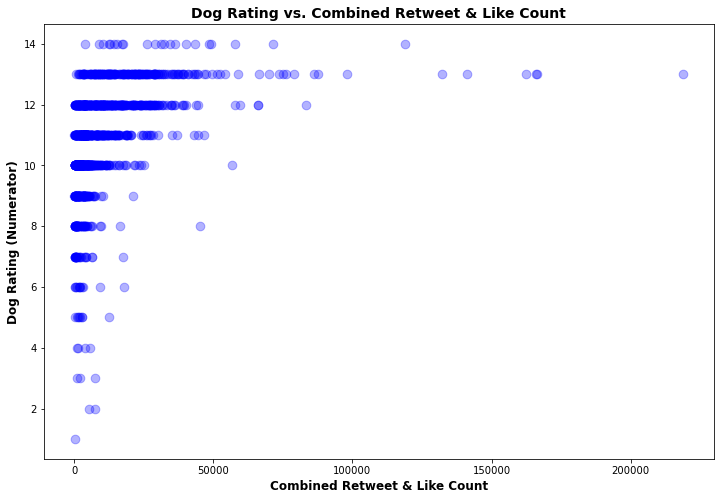

In [510]:
# create fig and a single axes/plot (ax)
fig, ax = plt.subplots(figsize=(12,8))

# assign x,y data
x = tweets_final.retwts_and_likes
y = tweets_final.rating_numerator

# plot
plt.scatter(x=x, y=y, color='b', s=75, alpha=.30)

# ax labeling and legend
ax.set_title('Dog Rating vs. Combined Retweet & Like Count', size=14, weight='bold')
ax.set_xlabel('Combined Retweet & Like Count', size=12, weight='bold')
ax.set_ylabel('Dog Rating (Numerator)', size=12, weight='bold');

**Scatter Plot Figure Data:** Courtesy of @WeRateDogs, Udacity and Twitter (for educational purposes).

# References
* Udacity DAND course materials
* Udacity PDSND course materials (completed ND)
* Udacity DAND knowledge
* https://docs.python.org/3/
* https://docs.python-requests.org/en/latest/
* https://docs.tweepy.org/en/stable/index.html
* https://stackoverflow.com/questions/8598228/f-write-vs-print-f
* https://stackoverflow.com/questions/3160699/python-progress-bar
* https://github.com/tqdm/tqdm
* https://regexone.com
* https://www.w3schools.com/python/
* https://matplotlib.org/stable/users/index.html